<a href="https://colab.research.google.com/github/sudarshanellora/Image-Classification/blob/main/Copy_of_xray_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy.stats import skew
import numpy as np
from numpy import mean, absolute
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte
from sklearn import preprocessing
from skimage.filters.rank import entropy
from skimage.morphology import disk
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
from statsmodels import robust
!pip install mahotas
import mahotas as mh
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 5.7MB 5.9MB/s 
Mounted at /content/drive


In [ ]:
#!pip install lazypredict
from lazypredict.Supervised import LazyClassifier

     |████████████████████████████████| 276kB 6.7MB/s 
     |████████████████████████████████| 127.6MB 84kB/s 
     |████████████████████████████████| 307kB 45.6MB/s 
     |████████████████████████████████| 256kB 31.3MB/s 
     |████████████████████████████████| 14.5MB 243kB/s 
     |████████████████████████████████| 25.9MB 91kB/s 
     |████████████████████████████████| 10.1MB 30.3MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 6.8MB 33.0MB/s 
     |████████████████████████████████| 1.2MB 32.1MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=81baeebd08ed28a1f3d58981a323f833434ae7548a460759552b774bb20672df
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.19.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement 

In [ ]:
!unzip  "/content/drive/MyDrive/ColabNotebooks/Covid/Radiography dataset.zip" -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/COVID-19_Radiography_Dataset/Normal/Normal-6710.png  
  inflating: /content/COVID-19_Radiography_Dataset/Normal/Normal-6711.png  
  inflating: /content/COVID-19_Radiography_Dataset/Normal/Normal-6712.png  
  inflating: /content/COVID-19_Radiography_Dataset/Normal/Normal-6713.png  
  inflating: /content/COVID-19_Radiography_Dataset/Normal/Normal-6714.png  
  inflating: /content/COVID-19_Radiography_Dataset/Normal/Normal-6715.png  
  inflating: /content/COVID-19_Radiography_Dataset/Normal/Normal-6716.png  
  inflating: /content/COVID-19_Radiography_Dataset/Normal/Normal-6717.png  
  inflating: /content/COVID-19_Radiography_Dataset/Normal/Normal-6718.png  
  inflating: /content/COVID-19_Radiography_Dataset/Normal/Normal-6719.png  
  inflating: /content/COVID-19_Radiography_Dataset/Normal/Normal-672.png  
  inflating: /content/COVID-19_Radiography_Dataset/Normal/Normal-6720.png  
  inflating: /content/COVID-19_Radiogr

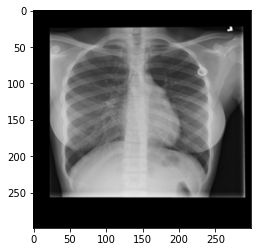

In [ ]:
img = cv2.imread("/content/COVID-19_Radiography_Dataset/Normal/Normal-1.png",0)
plt.imshow(img,cmap='gray')

In [ ]:
def features(img):
  dictionary = {}
  haralick_labels = ["Angular Second Moment",
                   "Contrast",
                   "Correlation",
                   "Sum of Squares: Variance",
                   "Inverse Difference Moment",
                   "Sum Average",
                   "Sum Variance",
                   "Sum Entropy",
                   "Entropy",
                   "Difference Variance",
                   "Difference Entropy",
                   "Information Measure of Correlation 1",
                   "Information Measure of Correlation 2",
                   "Maximal Correlation Coefficient",'dissimilarity','homogeneity','energy',"image_skew","image_kurtosis","image_mean","image_std","img_var",'range','1sto entropy','median','Median Absolute Deviation (MAD)','10th percentile','90th percentile','IQR','Mean Absolute Deviation (MAD)','RmeanAD']

  matrix_coocurrence = greycomatrix(img,distances=[1], angles=[0], levels=256,
                        symmetric=True, normed=True)
    
  h_feature = mh.features.haralick(img,compute_14th_feature=True)
  features  = list(h_feature[0])
  features.append(greycoprops(matrix_coocurrence, 'dissimilarity')[0,0])
  features.append(greycoprops(matrix_coocurrence, 'homogeneity')[0,0])
  features.append(greycoprops(matrix_coocurrence, 'energy')[0,0])
  img =img.flatten()
  features.append(st.skew(img))
  features.append(st.kurtosis(img))
  features.append(np.mean(img))
  features.append(np.std(img))
  features.append(np.var(img))
  features.append(int(max(img))-int(min(img)))
  features.append(st.entropy(img,None,2))
  features.append(np.median(img))
  features.append(np.median(img))
  features.append(robust.mad(img))
  def meanAD(data, axis=None):
    return mean(absolute(data - mean(data, axis)), axis)
  def RmeanAD(data, axis=None):
    data =data[(data>=np.percentile(img, 10)) & (data>=np.percentile(img, 90))]
    return mean(absolute(data - mean(data, axis)), axis)
  features.append(np.percentile(img, 10))
  features.append(np.percentile(img, 90))
  features.append( np.percentile(img, 75)- np.percentile(img, 25))
  features.append(meanAD(img))
  features.append(RmeanAD(img))
  for i in range(len(haralick_labels)):
    #print(haralick_labels[i])
    dictionary[haralick_labels[i]] =  features[i]
  return dictionary

In [ ]:
# def features(img):
#   dictionary = {}
#   haralick_labels = ["Angular Second Moment",
#                    "Contrast",
#                    "Correlation",
#                    "Sum of Squares: Variance",
#                    "Inverse Difference Moment",
#                    "Sum Average",
#                    "Sum Variance",
#                    "Sum Entropy",
#                    "Entropy",
#                    "Difference Variance",
#                    "Difference Entropy",
#                    "Information Measure of Correlation 1",
#                    "Information Measure of Correlation 2",
#                    "Maximal Correlation Coefficient",'dissimilarity','homogeneity','energy',"image_skew","image_kurtosis","image_mean","image_std","img_var"]

#   matrix_coocurrence = greycomatrix(img,distances=[1], angles=[0], levels=256,
#                         symmetric=True, normed=True)
    
#   h_feature = mh.features.haralick(img,compute_14th_feature=True)
#   features  = list(h_feature[0])
#   features.append(greycoprops(matrix_coocurrence, 'dissimilarity')[0,0])
#   features.append(greycoprops(matrix_coocurrence, 'homogeneity')[0,0])
#   features.append(greycoprops(matrix_coocurrence, 'energy')[0,0])
#   img =img.flatten()
#   features.append(st.skew(img))
#   features.append(st.kurtosis(img))
#   features.append(np.mean(img))
#   features.append(np.std(img))
#   features.append(np.var(img))
#   for i in range(len(haralick_labels)):
#    dictionary[haralick_labels[i]] =  features[i]
#   return dictionary

In [ ]:
output = pd.DataFrame()
y= []
for i in glob.glob("/content/COVID-19_Radiography_Dataset/COVID/*.png"):
  img = cv2.imread(i,0)
  output = output.append(features(img), ignore_index=True)
  y.append('covid')
for i in glob.glob("/content/COVID-19_Radiography_Dataset/Normal/*.png"):
  img = cv2.imread(i,0)
  output = output.append(features(img), ignore_index=True)
  y.append('normal')
output['val'] = y
print(output.shape)
output.head()

(13808, 32)


,10th percentile,1sto entropy,90th percentile,Angular Second Moment,Contrast,Correlation,Difference Entropy,Difference Variance,Entropy,IQR,Information Measure of Correlation 1,Information Measure of Correlation 2,Inverse Difference Moment,Maximal Correlation Coefficient,Mean Absolute Deviation (MAD),Median Absolute Deviation (MAD),RmeanAD,Sum Average,Sum Entropy,Sum Variance,Sum of Squares: Variance,dissimilarity,energy,homogeneity,image_kurtosis,image_mean,image_skew,image_std,img_var,median,range,val
0,47.443271,16.254626,38.0,0.001128,24.090380,0.994177,3.013950,0.000708,10.868147,158.0,-0.508663,0.999699,0.395322,3.463351,63.0,102.0,37.070008,198.350239,8.254005,8250.520831,2068.652803,2.658919,0.033590,0.395322,-0.438406,99.075995,-0.367922,45.499206,2070.177780,102.0,233.0,covid
1,72.647509,16.157253,0.0,0.012809,64.382382,0.995457,2.651389,0.000963,9.782427,245.0,-0.631454,0.999940,0.561209,4.217654,128.0,191.0,70.888451,323.624015,8.029053,28279.736966,7086.029837,2.342922,0.113176,0.561209,-0.698492,161.602096,-0.827800,84.212256,7091.704101,191.0,255.0,covid
2,28.169442,16.401572,91.0,0.002565,12.449608,0.994649,2.643930,0.001114,9.906965,177.0,-0.511403,0.999447,0.459080,3.330828,45.0,156.0,27.721790,287.436881,7.645068,4641.101103,1163.387678,1.985062,0.050649,0.459080,0.530486,143.753392,-1.125414,34.117926,1164.032864,156.0,179.0,covid
3,56.338884,16.236020,41.0,0.003402,29.566609,0.997025,3.141653,0.000633,10.965735,230.0,-0.548496,0.999874,0.424705,4.303022,97.0,178.0,58.375977,309.095307,8.495815,19844.431064,4968.499418,2.890261,0.058329,0.424705,-0.350137,154.348699,-0.804406,70.648584,4991.222399,178.0,255.0,covid
4,44.478067,16.375591,84.0,0.000536,38.197291,0.989310,3.323167,0.000524,11.419038,194.0,-0.460368,0.999459,0.309338,4.023977,61.0,133.0,34.575375,271.584083,8.410845,7108.079387,1786.569169,3.491246,0.023159,0.309338,-0.359146,135.824499,0.138165,42.236542,1783.925508,133.0,254.0,covid


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Covid/xray.csv')

In [ ]:
data.columns

Index(['Unnamed: 0', '10th percentile', '1sto entropy', '90th percentile',
       'Angular Second Moment', 'Contrast', 'Correlation',
       'Difference Entropy', 'Difference Variance', 'Entropy', 'IQR',
       'Information Measure of Correlation 1',
       'Information Measure of Correlation 2', 'Inverse Difference Moment',
       'Maximal Correlation Coefficient', 'Mean Absolute Deviation (MAD)',
       'Median Absolute Deviation (MAD)', 'RmeanAD', 'Sum Average',
       'Sum Entropy', 'Sum Variance', 'Sum of Squares: Variance',
       'dissimilarity', 'energy', 'homogeneity', 'image_kurtosis',
       'image_mean', 'image_skew', 'image_std', 'img_var', 'median', 'range',
       'val'],
      dtype='object')

In [ ]:
data.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
corr = data.loc[:,:'range'].corr()
corr

,10th percentile,1sto entropy,90th percentile,Angular Second Moment,Contrast,Correlation,Difference Entropy,Difference Variance,Entropy,IQR,Information Measure of Correlation 1,Information Measure of Correlation 2,Inverse Difference Moment,Maximal Correlation Coefficient,Mean Absolute Deviation (MAD),Median Absolute Deviation (MAD),RmeanAD,Sum Average,Sum Entropy,Sum Variance,Sum of Squares: Variance,dissimilarity,energy,homogeneity,image_kurtosis,image_mean,image_skew,image_std,img_var,median,range
10th percentile,1.00,-0.62,-0.65,0.07,0.17,0.36,0.39,-0.43,0.39,0.40,-0.06,0.27,-0.17,0.49,0.94,-0.30,0.91,-0.31,0.44,0.87,0.87,0.31,0.24,-0.17,-0.75,-0.31,0.64,0.87,0.87,-0.30,0.48
1sto entropy,-0.62,1.00,0.80,-0.67,-0.22,-0.22,-0.22,0.10,0.11,0.06,0.05,0.12,-0.10,-0.37,-0.70,0.66,-0.71,0.67,0.21,-0.70,-0.70,-0.23,-0.77,-0.10,0.57,0.67,-0.64,-0.68,-0.70,0.66,-0.29
90th percentile,-0.65,0.80,1.00,-0.24,-0.25,-0.20,-0.35,0.25,-0.15,0.19,-0.04,-0.06,0.09,-0.37,-0.65,0.68,-0.70,0.76,-0.07,-0.69,-0.69,-0.33,-0.45,0.09,0.71,0.76,-0.60,-0.68,-0.68,0.68,-0.24
Angular Second Moment,0.07,-0.67,-0.24,1.00,0.12,0.04,-0.14,0.29,-0.54,-0.06,-0.15,-0.42,0.35,0.08,0.26,-0.30,0.25,-0.27,-0.66,0.27,0.27,-0.05,0.87,0.35,-0.11,-0.27,0.22,0.23,0.27,-0.30,0.05
Contrast,0.17,-0.22,-0.25,0.12,1.00,-0.70,0.56,-0.41,0.27,0.04,0.40,-0.17,-0.31,0.46,0.21,-0.05,0.25,-0.09,0.03,0.23,0.23,0.72,0.18,-0.31,-0.20,-0.10,0.09,0.26,0.24,-0.05,0.32
Correlation,0.36,-0.22,-0.20,0.04,-0.70,1.00,-0.33,0.19,-0.11,0.30,-0.53,0.44,0.32,-0.11,0.36,-0.03,0.38,-0.01,0.19,0.39,0.39,-0.49,0.09,0.32,-0.20,-0.01,0.16,0.39,0.39,-0.03,0.11
Difference Entropy,0.39,-0.22,-0.35,-0.14,0.56,-0.33,1.00,-0.91,0.80,0.07,0.83,-0.22,-0.89,0.83,0.32,-0.17,0.35,-0.19,0.41,0.28,0.28,0.96,-0.07,-0.89,-0.43,-0.19,0.32,0.33,0.29,-0.17,0.36
Difference Variance,-0.43,0.10,0.25,0.29,-0.41,0.19,-0.91,1.00,-0.86,-0.25,-0.70,0.06,0.87,-0.76,-0.34,0.03,-0.38,0.03,-0.59,-0.30,-0.30,-0.82,0.22,0.87,0.41,0.04,-0.30,-0.37,-0.31,0.03,-0.53
Entropy,0.39,0.11,-0.15,-0.54,0.27,-0.11,0.80,-0.86,1.00,0.23,0.60,0.09,-0.87,0.56,0.23,-0.01,0.26,-0.00,0.85,0.17,0.17,0.70,-0.56,-0.87,-0.40,-0.00,0.31,0.26,0.18,-0.01,0.39
IQR,0.40,0.06,0.19,-0.06,0.04,0.30,0.07,-0.25,0.23,1.00,-0.27,0.30,0.02,0.33,0.43,0.64,0.51,0.68,0.44,0.52,0.52,0.02,-0.07,0.02,-0.09,0.68,-0.06,0.55,0.53,0.64,0.53


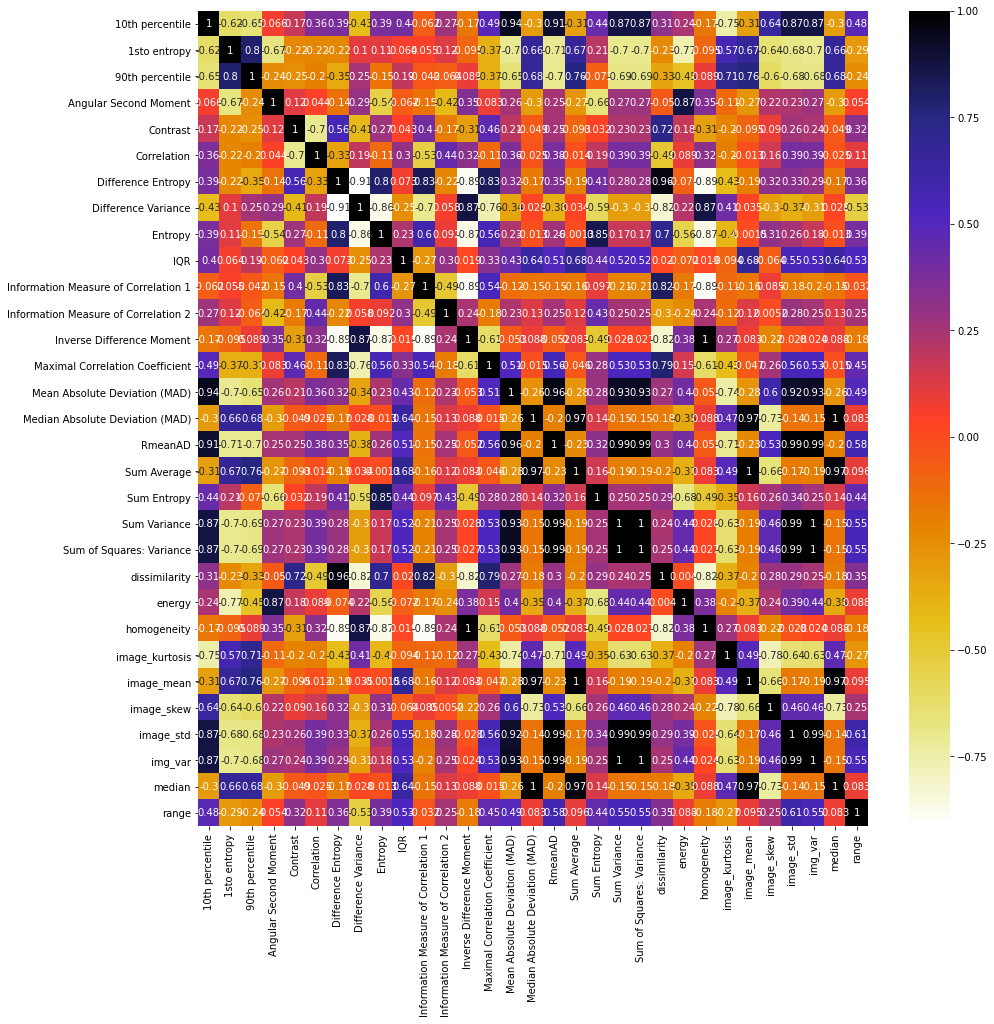

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:

corr_features = correlation(data.loc[:,:'range'], 0.85)
len(set(corr_features))

13

In [ ]:
data.drop(corr_features,axis=1,inplace=True)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['val'] = le.fit_transform(data['val'])
data.head()

,10th percentile,1sto entropy,90th percentile,Angular Second Moment,Contrast,Correlation,Difference Entropy,Difference Variance,Entropy,IQR,Information Measure of Correlation 1,Information Measure of Correlation 2,Maximal Correlation Coefficient,Median Absolute Deviation (MAD),Sum Entropy,image_kurtosis,image_skew,range,val
0,47.44,16.25,38.00,0.00,24.09,0.99,3.01,0.00,10.87,158.00,-0.51,1.00,3.46,102.00,8.25,-0.44,-0.37,233.00,0
1,72.65,16.16,0.00,0.01,64.38,1.00,2.65,0.00,9.78,245.00,-0.63,1.00,4.22,191.00,8.03,-0.70,-0.83,255.00,0
2,28.17,16.40,91.00,0.00,12.45,0.99,2.64,0.00,9.91,177.00,-0.51,1.00,3.33,156.00,7.65,0.53,-1.13,179.00,0
3,56.34,16.24,41.00,0.00,29.57,1.00,3.14,0.00,10.97,230.00,-0.55,1.00,4.30,178.00,8.50,-0.35,-0.80,255.00,0
4,44.48,16.38,84.00,0.00,38.20,0.99,3.32,0.00,11.42,194.00,-0.46,1.00,4.02,133.00,8.41,-0.36,0.14,254.00,0


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:,:-1])
from sklearn.decomposition import PCA
pca=PCA(n_components=15)
pca.fit(X)
x_pca=pca.transform(X)

y = data['val']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=52, test_size = 0.20)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:41<00:00,  1.43s/it]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.93,0.89,0.89,0.93,2.30
ExtraTreesClassifier,0.93,0.89,0.89,0.93,1.07
RandomForestClassifier,0.93,0.89,0.89,0.93,4.09
LGBMClassifier,0.92,0.88,0.88,0.92,0.47
LabelSpreading,0.92,0.87,0.87,0.92,9.17
LabelPropagation,0.92,0.87,0.87,0.92,5.48
BaggingClassifier,0.91,0.87,0.87,0.91,1.84
SVC,0.92,0.87,0.87,0.92,3.02
KNeighborsClassifier,0.92,0.86,0.86,0.92,0.40


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

In [ ]:
def cross_cal(mlmod,fold,X,y,s):
  scores = cross_val_score(mlmod, X, y, cv=fold)
  print("scores"+s,scores)
  print("\t")
  print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std())) 
  print("/n")   
def scores(a):
  TP = a[1][1]
  TN = a[0][0]
  FN = a[1][0]
  FP = a[0][1]
  Sensitivity = TP / (TP+FN) 
  Specificity = TN / (TN+FP) 
  Accuracy = (TP + TN) / (TP + TN + FN+FP)
  Precision = TP / (TP+FP)
  Fscore = (2*TP)/(2*(TP+FP+FN))
  print("Sensitivity,Specificity,Accuracy,Precision,Fscore",Sensitivity,Specificity,Accuracy,Precision,Fscore)
def mods(models,X,y):
  
  kfold_validation_5=KFold(5)
  kfold_validation_10=KFold(10)
  # skfold5=StratifiedKFold(n_splits=5)
  # skfold10=StratifiedKFold(n_splits=10)
  X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size = 0.20)
  models.fit(X_train, y_train)
  y_pred = models.predict(X_test)
  print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
  print("/n")
  a = confusion_matrix(y_test, y_pred)
  cross_cal(models,kfold_validation_5,X,y,"kfold_validation_5")
  cross_cal(models,kfold_validation_10,X,y,'kfold_validation_10')
  # cross_cal(models,skfold5,X,y,"skfold5")
  # cross_cal(models,skfold10,X,y,'skfold10')
  scores(a)

In [ ]:
model=DecisionTreeClassifier()
mods(model,X,y)

ACCURACY OF THE MODEL:  0.8649529326574946
/n
scoreskfold_validation_5 [0.58146271 0.87038378 0.90333092 0.88953278 0.90184716]
	
0.83 accuracy with a standard deviation of 0.12
/n
scoreskfold_validation_10 [0.71252715 0.73642288 0.79652426 0.90658943 0.91745112 0.91020999
 0.90152064 0.91455467 0.91666667 0.91086957]
	
0.86 accuracy with a standard deviation of 0.08
/n
Sensitivity,Specificity,Accuracy,Precision,Fscore 0.905911330049261 0.7513661202185792 0.8649529326574946 0.9099455714992578 0.831374321880651


In [ ]:
svm_mod = SVC()
mods(svm_mod,X,y)

ACCURACY OF THE MODEL:  0.9167270094134685
/n
scoreskfold_validation_5 [0.39862419 0.91165822 0.96162201 0.96269468 0.95979717]
	
0.84 accuracy with a standard deviation of 0.22
/n
scoreskfold_validation_10 [0.69152788 0.69370022 0.84214337 0.96813903 0.97031137 0.96886314
 0.97031137 0.96524258 0.96956522 0.96376812]
	
0.90 accuracy with a standard deviation of 0.11
/n
Sensitivity,Specificity,Accuracy,Precision,Fscore 0.9684729064039409 0.773224043715847 0.9167270094134685 0.9221388367729831 0.895264116575592


In [ ]:
clf_rf = RandomForestClassifier()
mods(clf_rf,X,y)


ACCURACY OF THE MODEL:  0.9272266473569877
/n
scoreskfold_validation_5 [0.51593049 0.9243302  0.95872556 0.95255342 0.95182905]
	
0.86 accuracy with a standard deviation of 0.17
/n
scoreskfold_validation_10 [0.73352643 0.76321506 0.85734975 0.96596669 0.96813903 0.96162201
 0.96958726 0.95655322 0.96231884 0.96086957]
	
0.91 accuracy with a standard deviation of 0.09
/n
Sensitivity,Specificity,Accuracy,Precision,Fscore 0.9660098522167487 0.819672131147541 0.9272266473569877 0.9369326325848065 0.9070305272895467
